In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ratings_df = pd.read_csv("ml-latest/ratings.csv").drop("timestamp", axis=1)

In [3]:
test_ratings = ratings_df.sample(int(len(ratings_df)*0.2), random_state=0xc00ff3)
sampled_indices = test_ratings.index

test_pairs =  test_ratings[["userId", "movieId"]]
actual_ratings = test_ratings["rating"]

train_ratings = ratings_df.drop(sampled_indices)

del ratings_df

In [4]:
movies_df = pd.read_csv("ml-latest/movies.csv").drop("title", axis=1)
movies_df

,movieId,genres
0,1,Adventure|Animation|Children|Comedy|Fantasy
1,2,Adventure|Children|Fantasy
2,3,Comedy|Romance
3,4,Comedy|Drama|Romance
4,5,Comedy
...,...,...
86532,288967,Action|Drama
86533,288971,Action|Horror
86534,288975,Documentary
86535,288977,Crime|Thriller


In [6]:
train_ratings_merged = pd.merge(train_ratings, movies_df, on="movieId")
train_ratings_merged

,userId,movieId,rating,genres
0,1,1,4.0,Adventure|Animation|Children|Comedy|Fantasy
1,2,1,5.0,Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.0,Adventure|Animation|Children|Comedy|Fantasy
3,10,1,3.0,Adventure|Animation|Children|Comedy|Fantasy
4,12,1,5.0,Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...
27065725,330904,228179,4.5,Comedy|Drama
27065726,330904,261553,3.5,Drama
27065727,330904,279870,3.0,Drama|War
27065728,330914,189165,1.0,Children|Comedy|Fantasy


In [7]:
train_ratings_merged["genres"] = train_ratings_merged["genres"].str.split("|") 
train_ratings_merged = train_ratings_merged.explode('genres').reset_index(drop=True)
train_ratings_merged

,userId,movieId,rating,genres
0,1,1,4.0,Adventure
1,1,1,4.0,Animation
2,1,1,4.0,Children
3,1,1,4.0,Comedy
4,1,1,4.0,Fantasy
...,...,...,...,...
73692955,330914,189165,1.0,Children
73692956,330914,189165,1.0,Comedy
73692957,330914,189165,1.0,Fantasy
73692958,330922,269782,0.5,Adventure


In [8]:
movies_df.groupby("genres").count()
# we will delete no genres because it is not good for similarity comparison

,movieId
genres,
(no genres listed),34
Action,60
Action|Adventure,32
Action|Adventure|Animation,18
Action|Adventure|Animation|Children,6
...,...
Sci-Fi|Thriller,23
Sci-Fi|Thriller|IMAX,1
Thriller,84


In [8]:
average_genre_score = train_ratings_merged.drop(["userId", "movieId"], axis=1).groupby("genres").mean()
genre_avg_score_map = average_genre_score['rating'].to_dict()
average_genre_score

,rating
genres,
(no genres listed),3.377577
Action,3.479832
Adventure,3.525999
Animation,3.615493
Children,3.437499
Comedy,3.432230
Crime,3.697110
Documentary,3.693264
Drama,3.685828


In [9]:
X = train_ratings_merged.pivot_table(index="userId", columns="genres", values="rating", aggfunc="mean").drop("(no genres listed)", axis=1).fillna(genre_avg_score_map)
X

genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
1,4.142857,4.100000,4.083333,3.937500,3.800000,4.000000,3.693264,4.065217,4.277778,3.915148,3.750000,4.000000,3.833333,3.673741,4.033333,3.625000,4.200000,4.666667,3.595774
2,3.192308,3.470588,4.250000,3.857143,3.600000,3.666667,3.693264,3.676471,3.500000,3.915148,3.500000,4.333333,4.000000,2.500000,3.636364,2.625000,3.454545,4.600000,3.666667
3,4.800000,5.000000,5.000000,5.000000,4.800000,5.000000,3.693264,4.923077,5.000000,3.915148,5.000000,5.000000,3.547354,5.000000,5.000000,4.400000,4.857143,5.000000,5.000000
4,4.250000,4.277778,4.500000,4.285714,4.166667,4.333333,3.693264,4.357143,4.500000,3.915148,3.306805,4.300000,4.500000,3.666667,4.437500,3.900000,4.000000,5.000000,3.595774
5,3.111111,2.500000,3.615493,3.000000,3.181818,3.666667,4.000000,3.714286,2.666667,3.915148,3.000000,3.607470,2.500000,4.250000,3.600000,4.000000,3.416667,3.500000,3.595774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330971,3.843750,4.307692,5.000000,5.000000,3.625000,4.214286,3.693264,4.105263,4.500000,3.915148,4.200000,4.000000,3.547354,3.875000,3.600000,3.687500,3.555556,3.900000,3.666667
330972,2.800000,3.214286,3.625000,3.411765,3.103448,3.375000,3.693264,3.636364,3.444444,3.915148,3.000000,4.000000,3.833333,4.250000,3.375000,3.857143,3.250000,3.600000,3.250000
330973,3.083333,2.750000,3.615493,2.250000,3.071429,3.833333,3.693264,3.583333,2.500000,3.915148,2.500000,4.250000,3.547354,4.000000,4.750000,4.000000,3.333333,3.797732,3.595774


In [10]:
from sklearn.cluster import KMeans

In [16]:
def predict(user_id, movie_id, user_clusters, cluster_ratings, average_ranking):

    if user_id not in user_clusters.index:
        return average_ranking
    
    cluster = int(user_clusters.loc[user_id, "cluster"])
    
    try:
        rating = cluster_ratings.loc[(cluster, movie_id), "rating"]
        
    except KeyError:
        rating = train_ratings.loc[train_ratings["movieId"] == movie_id]["rating"].mean()
        if np.isnan(rating):
            return average_ranking
        else:
            return rating

        
    return rating

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
average_ranking = train_ratings["rating"].mean()

In [19]:
%%time
inertias = []
Ks = range(2,20)
for k in Ks:
    print(f"Training for k={k}")
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0xc00ff3).fit(X)
    inertias.append(kmeans.inertia_)
    # dodane
    user_clusters = pd.DataFrame({"userId": X.index, "cluster": kmeans.labels_}).set_index("userId")
    cluster_ratings = pd.merge(train_ratings, user_clusters, how="left", on="userId").drop("userId", axis=1)
    cluster_ratings = cluster_ratings.groupby(["cluster", "movieId"]).mean()
    y_predicted = test_pairs.apply(lambda row: predict(row['userId'], row['movieId'],user_clusters, cluster_ratings, average_ranking), axis=1)
    mse = mean_squared_error(actual_ratings, y_predicted)
    print(f"Mean Squared Error: {mse} for k={k}")
    



Training for k=2
Mean Squared Error: 0.8393391670875189 for k=2
Training for k=3
Mean Squared Error: 0.8092623623487172 for k=3
Training for k=4
Mean Squared Error: 0.7950886924671091 for k=4
Training for k=5
Mean Squared Error: 0.7938223112075135 for k=5
Training for k=6
Mean Squared Error: 0.7896635552965887 for k=6
Training for k=7
Mean Squared Error: 0.7878289850189858 for k=7
Training for k=8
Mean Squared Error: 0.7871043271071032 for k=8
Training for k=9
Mean Squared Error: 0.784697828674757 for k=9
Training for k=10
Mean Squared Error: 0.7843307324687456 for k=10
Training for k=11
Mean Squared Error: 0.7846825923614643 for k=11
Training for k=12
Mean Squared Error: 0.7831758399112297 for k=12
Training for k=13
Mean Squared Error: 0.782088301929242 for k=13
Training for k=14
Mean Squared Error: 0.7813030528007797 for k=14
Training for k=15
Mean Squared Error: 0.7820774006250485 for k=15
Training for k=16
Mean Squared Error: 0.784041633978162 for k=16
Training for k=17
Mean Square

In [21]:
inertias

[2171160.006172864,
 1956509.0282622003,
 1862311.836849501,
 1798833.6767109279,
 1749227.051340124,
 1704595.4570207861,
 1672354.6014799736,
 1643836.8555558838,
 1619291.7077528848,
 1597945.7694392926,
 1577777.6630080666,
 1559247.1911361197,
 1542618.1600317736,
 1527785.2182389614,
 1512685.2250454794,
 1499896.6313748877,
 1486815.7907216197,
 1474686.3537096218]

<Axes: >

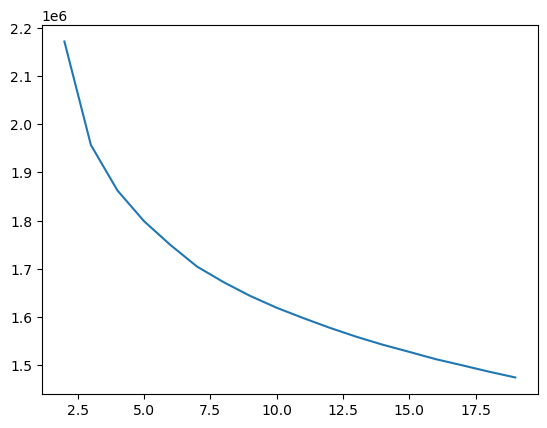

In [20]:
sns.lineplot(x=Ks, y=inertias)

iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16


/home/krzys/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/krzys/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


CPU times: user 1min 13s, sys: 165 ms, total: 1min 14s
Wall time: 1min 13s


<Axes: >

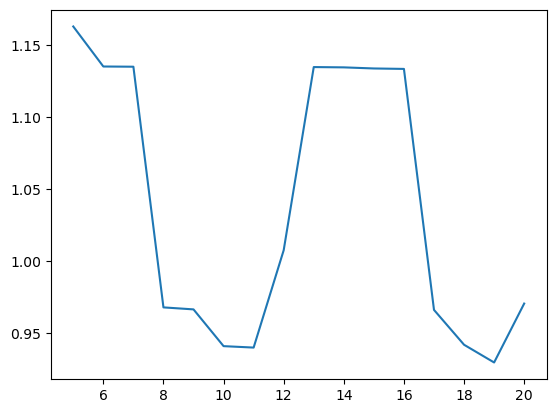

In [44]:
%%time
from sklearn.cluster import AgglomerativeClustering
i = 1
scores = []
Ks = range(20,4,-1)
for k in Ks:
    print(f"iteration:  {i}")

    ahc = AgglomerativeClustering(n_clusters=k, linkage="average").fit(X)
    
    user_clusters = pd.DataFrame({"userId": X.index, "cluster": ahc.labels_}).set_index("userId")
    
    cluster_ratings = cluster_ratings.groupby(["cluster", "movieId"]).mean()
    
    y_predicted = test_pairs.apply(lambda row: predict(row['userId'], row['movieId'],user_clusters, cluster_ratings, average_ranking), axis=1)
    scores.append(mean_squared_error(y_predicted, actual_ratings))
    i+=1

sns.lineplot(x=Ks, y=scores)